# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [1]:
import matplotlib
import numpy as np
import pandas as pd

❓ Run `!ls -lh` to list files in the current folder. You should see a `.csv` file.

In [3]:
!ls -lh

total 76K
-rw-r--r-- 1 nandosoq nandosoq 2.4K Jul 19 15:17 README.md
-rw-r--r-- 1 nandosoq nandosoq 9.7K Jul 26 17:04 Recap.ipynb
-rw-r--r-- 1 nandosoq nandosoq  60K Jul 26 17:04 titanic.csv


❓ Load the CSV data as a into a `titanic_df` variable.

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [4]:
titanic_df = pd.read_csv('titanic.csv')

❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [13]:
titanic_df.shape


(891, 11)

In [25]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [12]:
titanic_df.drop(columns=['Cabin'], inplace = True)

## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [29]:
pclass_df = titanic_df.groupby(['Pclass']).count()[['PassengerId']].rename(columns={'PassengerId': "Tickets_sold"})

Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

<AxesSubplot:xlabel='Pclass'>

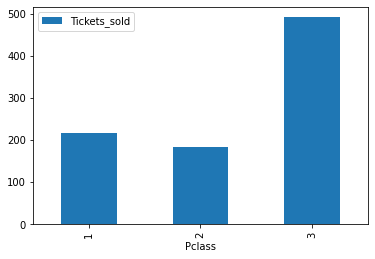

In [30]:
pclass_df.plot(kind='bar')

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

<AxesSubplot:xlabel='Pclass'>

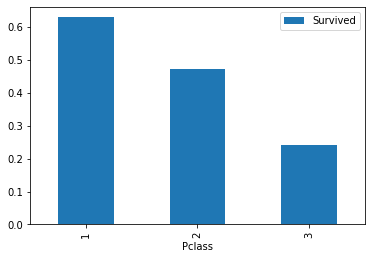

In [39]:
titanic_df.groupby('Pclass').mean()[['Survived']].rename(columns={'PassengerId': "frequency of survivals"}).plot(kind='bar')

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [0]:
# YOUR CODE HERE

❓ Plot a barchart of survival frequency of each gender. Who survived the most?

In [0]:
titanic_df.groupby('Sex').agg

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

<AxesSubplot:xlabel='Sex'>

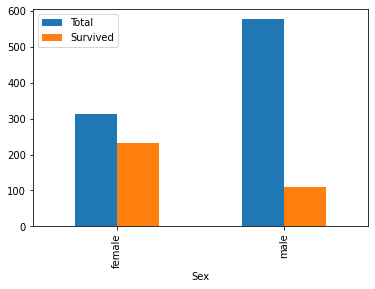

In [50]:
survivors_df = titanic_df.groupby('Sex').agg({'Survived':['count','sum']})['Survived'].rename(columns={'count': "Total", 'sum':'Survived'})
survivors_df.plot(kind='bar')

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [65]:
children_df = titanic_df[titanic_df['Age']<18]

❓ How many children were there in the Titanic?

In [74]:
children_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S


In [66]:
children_df.count()[0]

113

❓ How many children survived?

In [67]:
children_df['Survived'].sum()

61

In [89]:
df_child = pd.DataFrame({'Total': [children_df.count()[0]],
                    'Survived': [children_df['Survived'].sum()]})

In [88]:
survivors_df_2 = survivors_df - children_df.groupby('Sex').agg({'Survived':['count','sum']})['Survived'].rename(columns={'count': "Total", 'sum':'Survived'})


❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

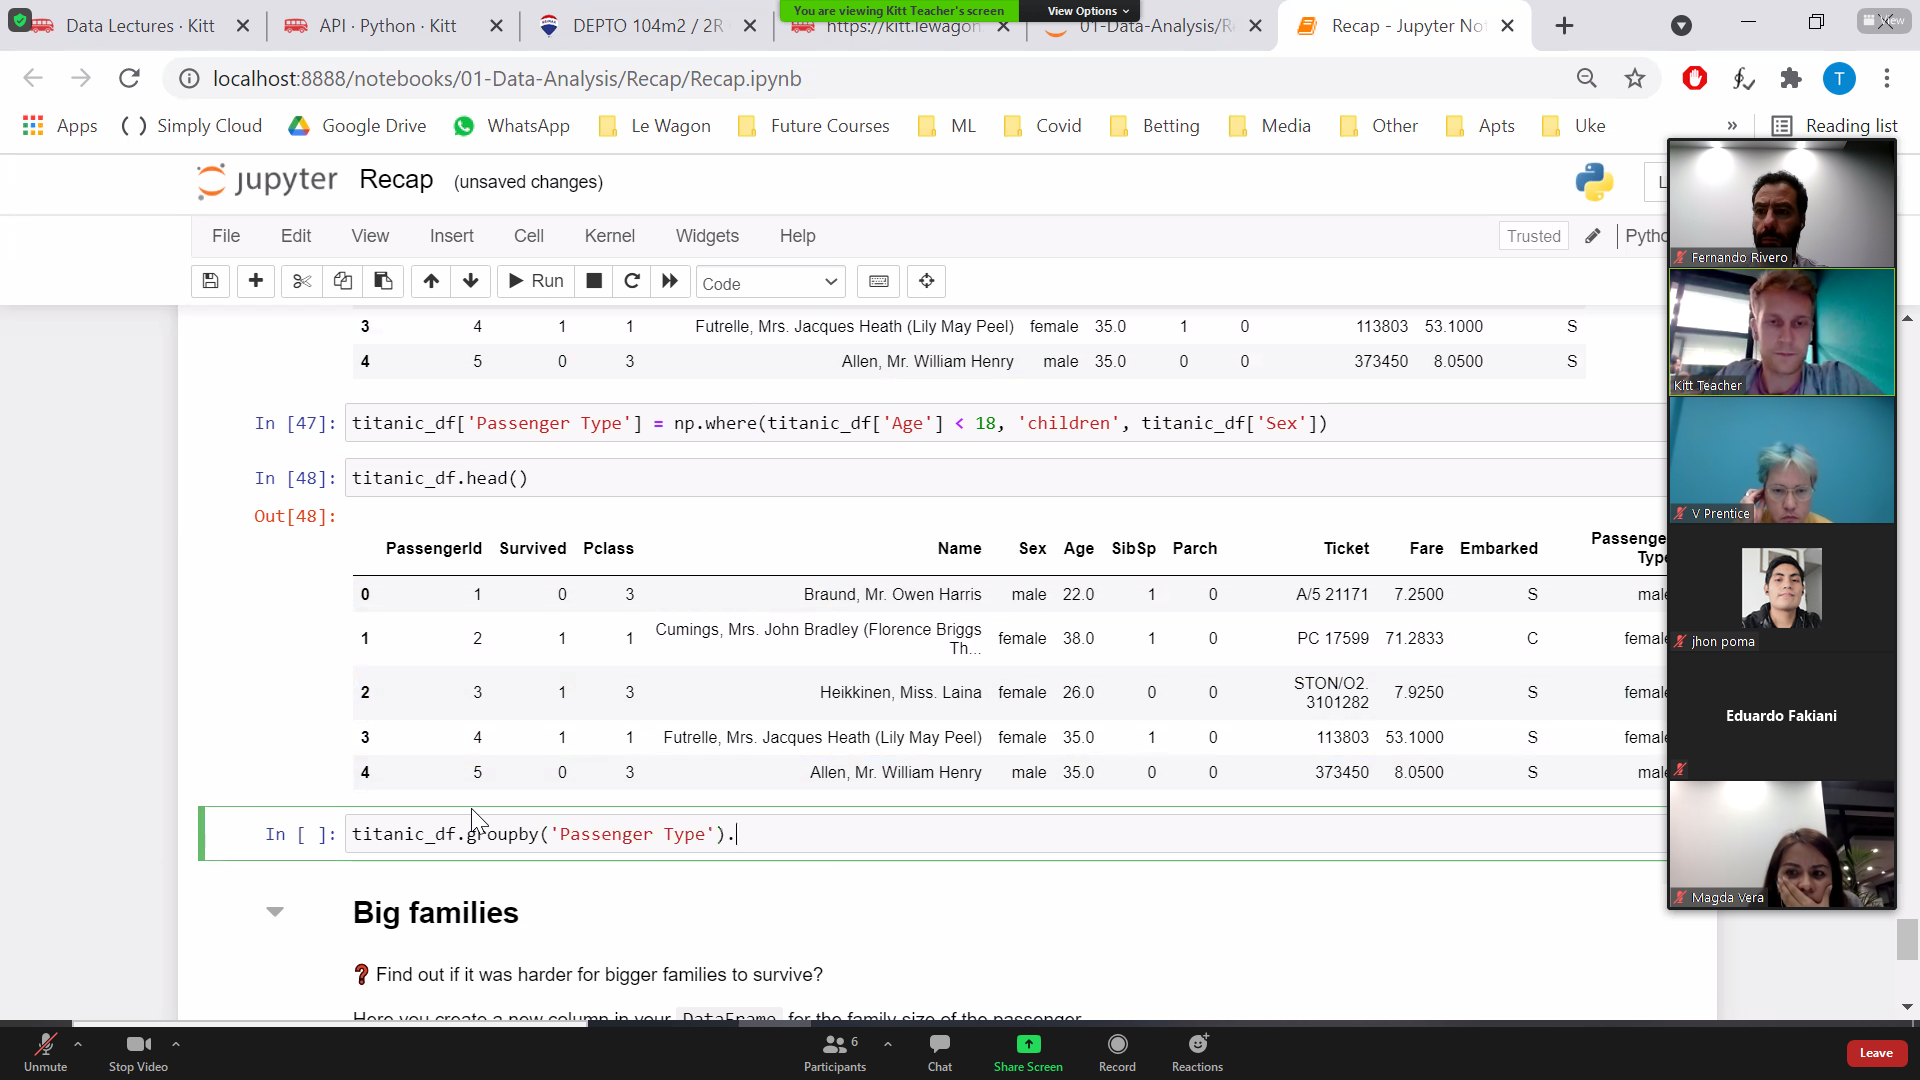

<AxesSubplot:xlabel='Sex'>

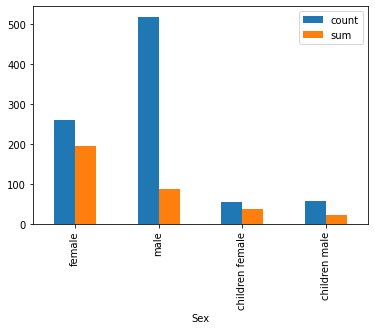

In [90]:
survivors_df = titanic_df.groupby("Sex").agg({'Survived':['count', 'sum']})


survivors_children_df = children_df.groupby("Sex").agg({'Survived':['count', 'sum']})
survivors_children_df.rename(index = {'male':'children male', 'female':'children female'}, inplace = True)

survivors_df.loc['female'] -= survivors_children_df.loc['children female']
survivors_df.loc['male'] -= survivors_children_df.loc['children male']
total_df = pd.concat([survivors_df, survivors_children_df])

total_df['Survived'].plot(kind = 'bar')


## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

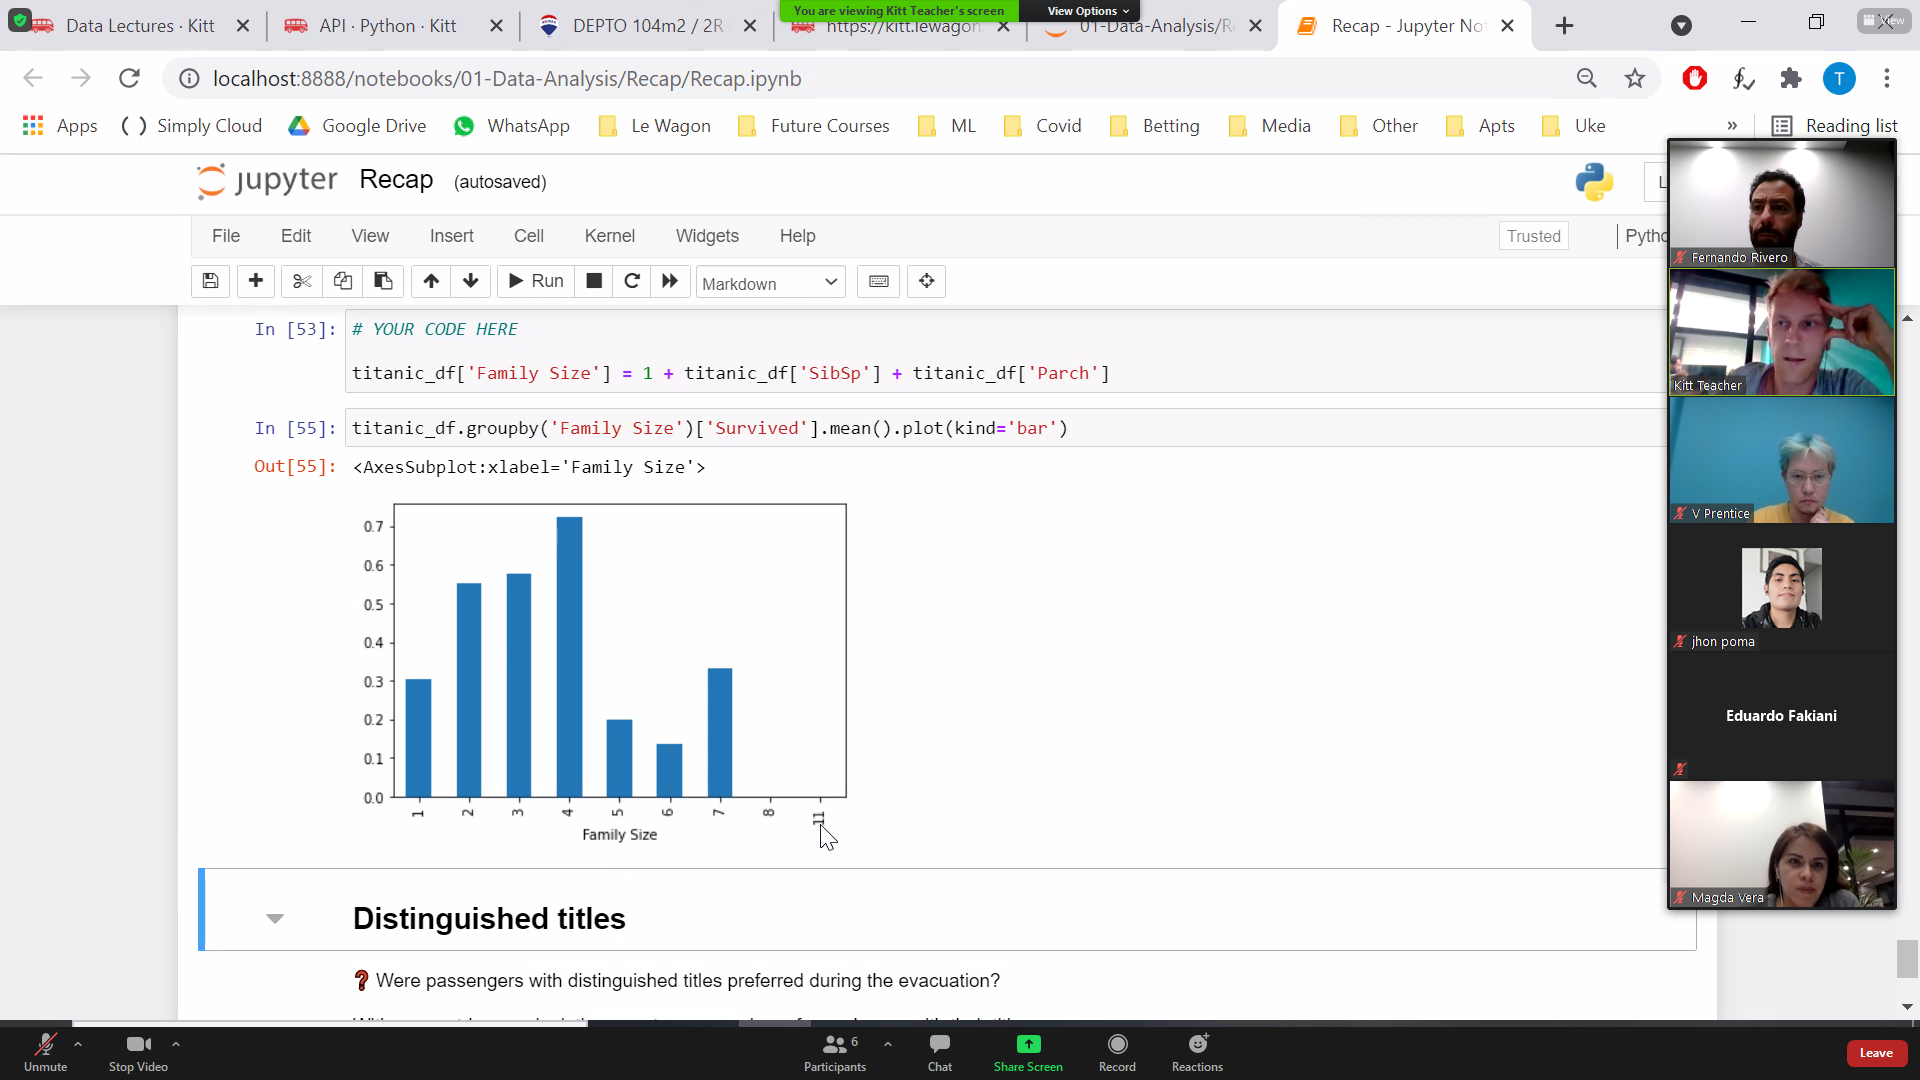

## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

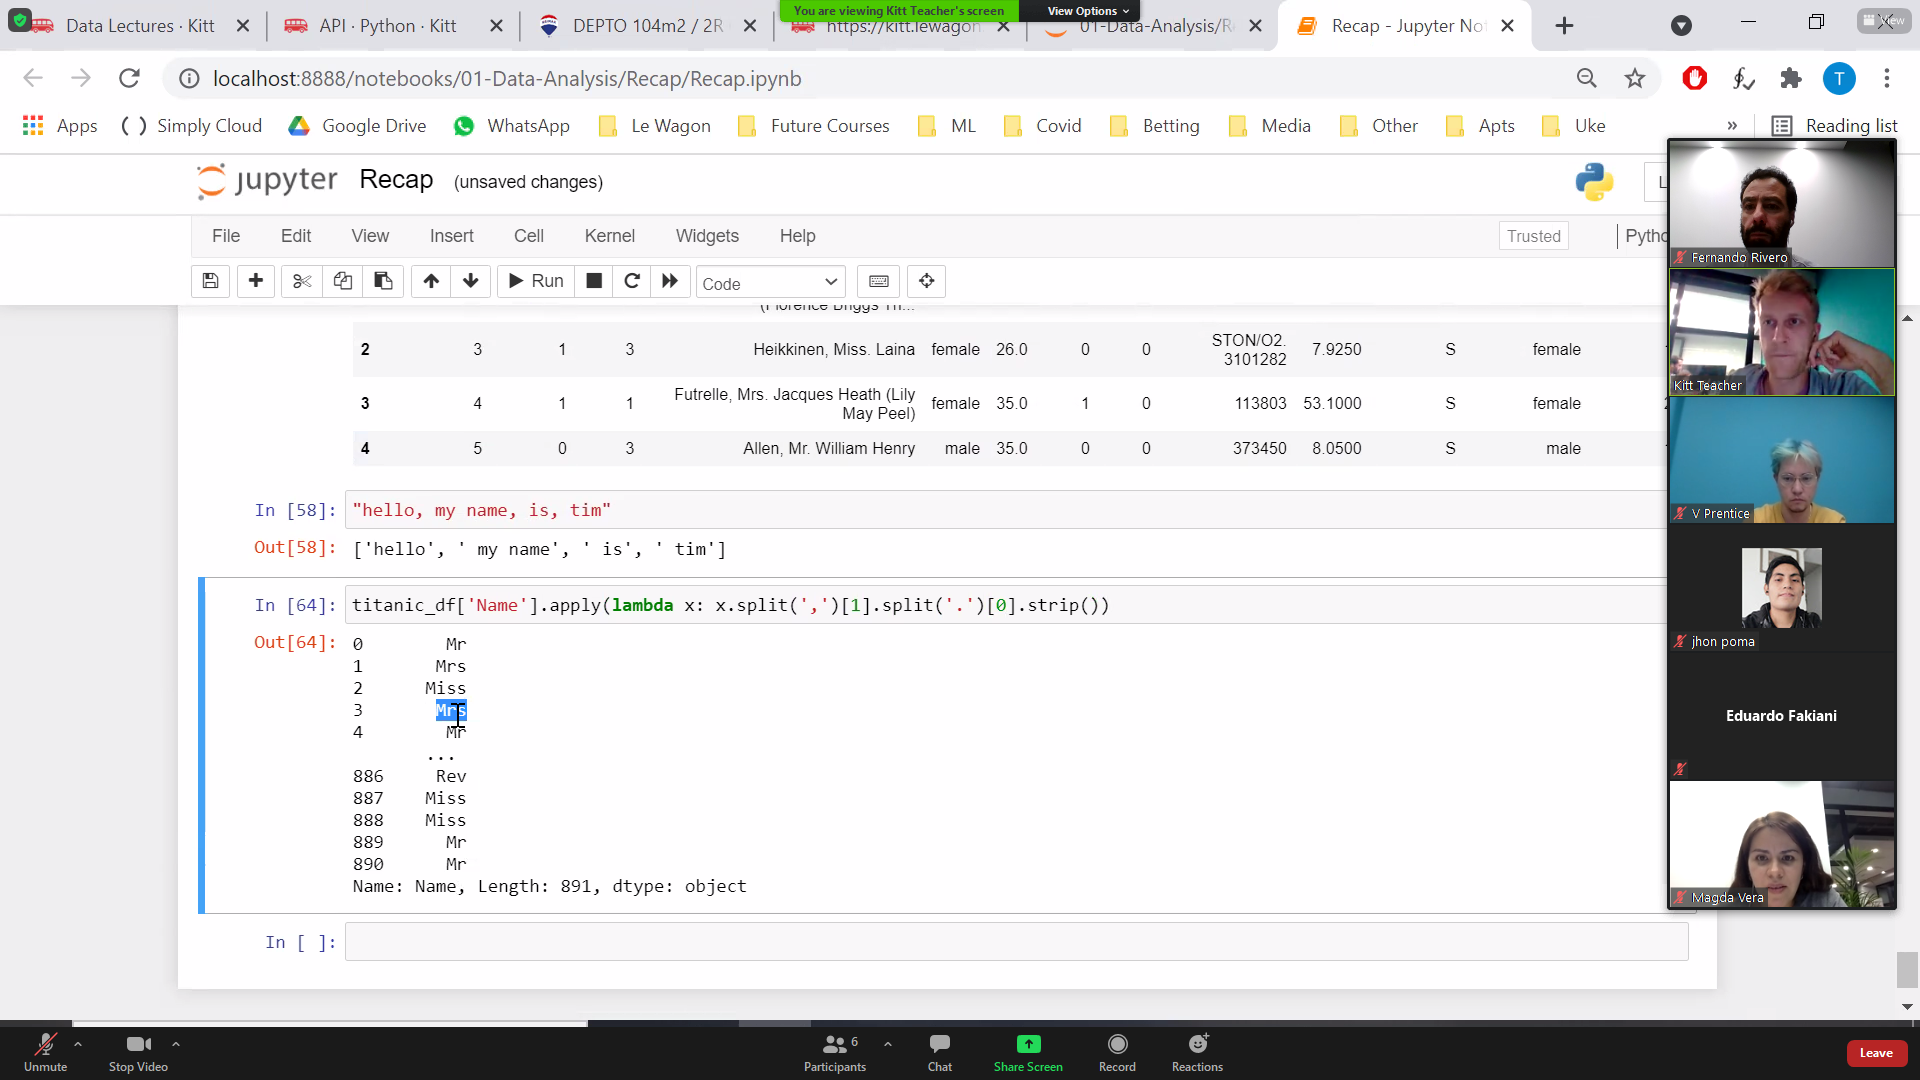titanic_df